## Importaciones

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


## Tipos de datos 

In [33]:
data = pd.read_csv("data/IA_PROPENSITY_TRAIN.csv")
data.head()

,CODE,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,...,REV_Garantia,Averia_grave,QUEJA_CAC,EDAD_COCHE,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
0,CLI1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,...,NO DATA,Averia muy grave,SI,208,2892,0,0,2,18,0
1,CLI2,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,...,SI,No,NO,245,1376,7187,0,2,53,0
2,CLI3,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,...,NO DATA,No,NO,251,1376,0,1,4,21,3
3,CLI4,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Empresa,...,SI,Averia muy grave,SI,243,2015,7256,1,4,48,5
4,CLI5,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Funcionario,...,NO DATA,No,NO,23,1818,0,1,3,21,3


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58049 entries, 0 to 58048
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CODE             58049 non-null  object
 1   PRODUCTO         58049 non-null  object
 2   TIPO_CARROCERIA  58049 non-null  object
 3   COMBUSTIBLE      58049 non-null  object
 4   Potencia         58049 non-null  object
 5   TRANS            58049 non-null  object
 6   FORMA_PAGO       58049 non-null  object
 7   ESTADO_CIVIL     57159 non-null  object
 8   GENERO           57189 non-null  object
 9   OcupaciOn        58049 non-null  object
 10  PROVINCIA        58049 non-null  object
 11  Campanna1        58049 non-null  object
 12  Campanna2        58049 non-null  object
 13  Campanna3        58049 non-null  object
 14  Zona_Renta       44871 non-null  object
 15  REV_Garantia     58049 non-null  object
 16  Averia_grave     58048 non-null  object
 17  QUEJA_CAC        58049 non-null

## EDA (Analisis exploratorio de datos )

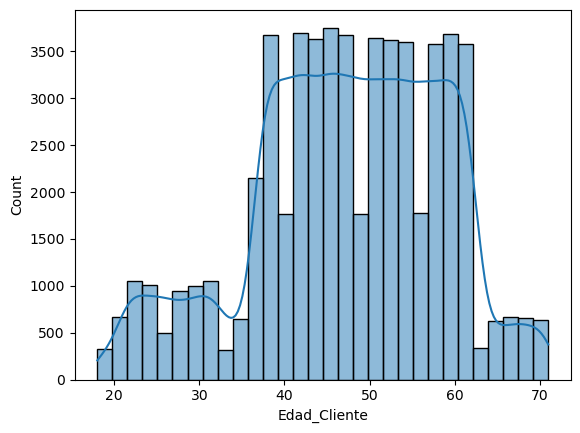

In [35]:
# Vamos a ver cuales son los numeros de la edad de los clientes 
sns.histplot(data["Edad_Cliente"], bins=30, kde=True)
plt.show()

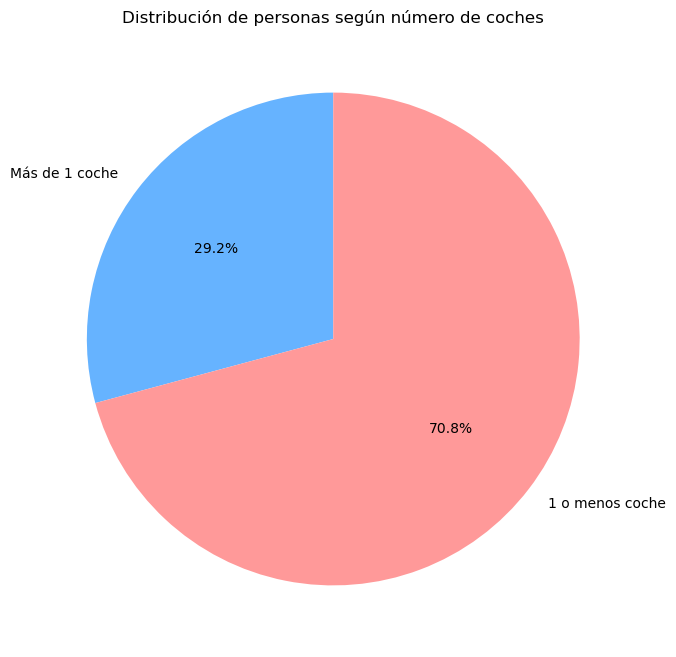

In [36]:


# Creamos listas con los valores y etiquetas
sizes = [num_mas_1_coche, num_no_mas_1_coche]
labels = ['Más de 1 coche', '1 o menos coche']

# Graficamos el diagrama de pastel
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title("Distribución de personas según número de coches")
plt.show()

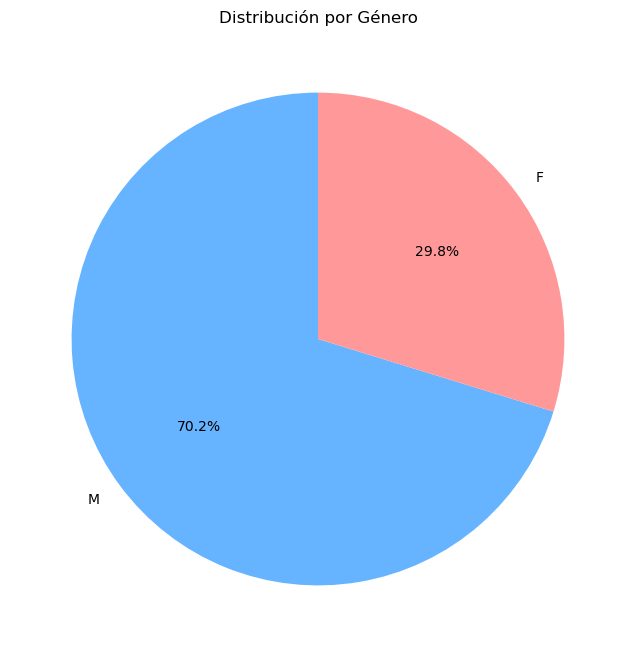

In [37]:
conteo_genero = data['GENERO'].value_counts()

# Crear el diagrama de pastel
plt.figure(figsize=(8, 8))
plt.pie(conteo_genero, 
        labels=conteo_genero.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=['#66b3ff', '#ff9999', '#99ff99', '#ffcc99'])  # Puedes ajustar los colores según el número de categorías
plt.title("Distribución por Género")
plt.show()

## Limpieza de datos

In [38]:
print(data.isnull().sum()) 

CODE                   0
PRODUCTO               0
TIPO_CARROCERIA        0
COMBUSTIBLE            0
Potencia               0
TRANS                  0
FORMA_PAGO             0
ESTADO_CIVIL         890
GENERO               860
OcupaciOn              0
PROVINCIA              0
Campanna1              0
Campanna2              0
Campanna3              0
Zona_Renta         13178
REV_Garantia           0
Averia_grave           1
QUEJA_CAC              0
EDAD_COCHE             0
COSTE_VENTA            0
km_anno                0
Mas_1_coche            0
Revisiones             0
Edad_Cliente           0
Tiempo                 0
dtype: int64


In [39]:
data.describe()


,EDAD_COCHE,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
count,58049.000000,58049.000000,58049.000000,58049.000000,58049.000000,58049.000000,58049.000000
mean,469.247050,2540.125756,11805.893607,0.291857,3.529587,47.351255,1.859119
std,308.121789,1603.556511,10205.363971,0.454621,2.528413,11.239984,3.091309
min,2.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
25%,193.000000,1595.000000,0.000000,0.000000,1.000000,40.000000,0.000000
50%,382.000000,2353.000000,11486.000000,0.000000,3.000000,48.000000,0.000000
75%,778.000000,3301.000000,17927.000000,1.000000,5.000000,56.000000,4.000000
max,975.000000,18455.000000,182331.000000,1.000000,13.000000,71.000000,14.000000


In [40]:
# datos totales que tenfo 
data.shape

(58049, 25)

In [42]:
data = data.drop_duplicates()


##### Label encoder 

In [43]:
columnas_no_numericas = data.select_dtypes(exclude=['number']).columns
print(columnas_no_numericas)


Index(['CODE', 'PRODUCTO', 'TIPO_CARROCERIA', 'COMBUSTIBLE', 'Potencia',
       'TRANS', 'FORMA_PAGO', 'ESTADO_CIVIL', 'GENERO', 'OcupaciOn',
       'PROVINCIA', 'Campanna1', 'Campanna2', 'Campanna3', 'Zona_Renta',
       'REV_Garantia', 'Averia_grave', 'QUEJA_CAC'],
      dtype='object')


In [45]:
data = pd.read_csv("data/IA_PROPENSITY_TRAIN.csv")
data.head()

,CODE,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,...,REV_Garantia,Averia_grave,QUEJA_CAC,EDAD_COCHE,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
0,CLI1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,...,NO DATA,Averia muy grave,SI,208,2892,0,0,2,18,0
1,CLI2,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,...,SI,No,NO,245,1376,7187,0,2,53,0
2,CLI3,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,...,NO DATA,No,NO,251,1376,0,1,4,21,3
3,CLI4,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Empresa,...,SI,Averia muy grave,SI,243,2015,7256,1,4,48,5
4,CLI5,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Funcionario,...,NO DATA,No,NO,23,1818,0,1,3,21,3


In [ ]:
columnas_categoricas = ['PRODUCTO', 'TIPO_CARROCERIA', 'COMBBUSTIBLE', '', 'Genero', 'Ciudad', 'Color']
encoders = {}  # Diccionario para guardar los encoders

for col in columnas_categoricas:
    le = LabelEncoder()  # Crear un LabelEncoder por cada columna
    df[col] = le.fit_transform(df[col])  # Aplicarlo a la columna
    encoders[col] = le  # Guardarlo en el diccionario

# Ver el resultado
print(df.head())

# Ver los valores codificados de cada columna
for col, le in encoders.items():
    print(f"Columna: {col}")
    print(dict(enumerate(le.classes_)))  # Muestra qué número corresponde a cada categoría
    print("-" * 30)
